# **Adiciona caminho de src para permitir importações a este notebook**

In [1]:
import sys
from pathlib import Path

# Define o caminho base do projeto (um nível acima de /notebooks)
BASE_DIR = Path(__file__).resolve().parent.parent  if '__file__' in globals() else Path.cwd().parent

# Caminho para a pasta src/
SRC_DIR = BASE_DIR / "src"

# Adiciona SRC_DIR e BASE_DIR ao sys.path
sys.path.append(str(BASE_DIR))
sys.path.append(str(SRC_DIR))

# **Análise Estatística do Dataset**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import os

# Carregamento do dataset processado
processed_df = pd.read_csv(os.path.join(BASE_DIR, "data", "processed", "processed_dataset.csv"))

## Distribuição da Quantidade de Notícias por Classe

Contagem de notícias por classe:
label
0    23472
1    21417
Name: count, dtype: int64

Proporção (%):
label
0    52.288979
1    47.711021
Name: proportion, dtype: float64


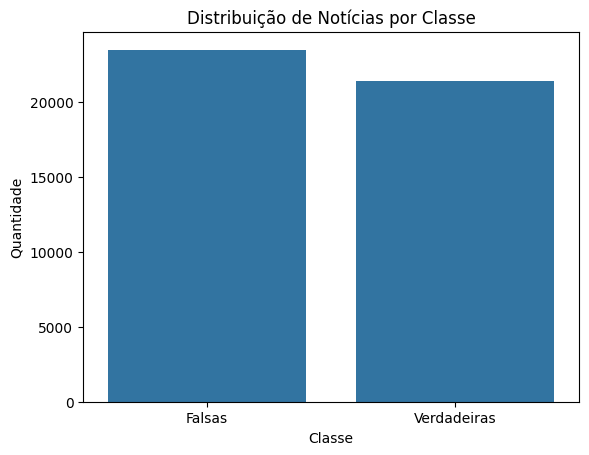

In [3]:
# Contagem absoluta
class_counts = processed_df['label'].value_counts()
# Proporção
class_percent = processed_df['label'].value_counts(normalize=True) * 100

print("Contagem de notícias por classe:")
print(class_counts)
print("\nProporção (%):")
print(class_percent)

# Visualização
sns.countplot(x='label', data=processed_df)
plt.xticks(ticks=[0, 1], labels=['Falsas', 'Verdadeiras'])
plt.title('Distribuição de Notícias por Classe')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.show()

## Comprimento Médio dos Textos

In [4]:
processed_df['text_length'] = processed_df['full_text_clean'].apply(lambda x: len(x.split()))
processed_df['char_length'] = processed_df['full_text_clean'].apply(len)

# Estatísticas descritivas
print("Estatísticas do comprimento dos textos (em palavras):")
print(processed_df['text_length'].describe())

print("\nEstatísticas do comprimento dos textos (em caracteres):")
print(processed_df['char_length'].describe())


Estatísticas do comprimento dos textos (em palavras):
count    44889.000000
mean       237.630154
std        199.302557
min          3.000000
25%        125.000000
50%        210.000000
75%        296.000000
max       4853.000000
Name: text_length, dtype: float64

Estatísticas do comprimento dos textos (em caracteres):
count    44889.000000
mean      1761.317049
std       1512.675008
min         22.000000
25%        914.000000
50%       1550.000000
75%       2189.000000
max      37947.000000
Name: char_length, dtype: float64


### Comprimento em Palavras

- **Média:** Os textos possuem, em média, cerca de 238 palavras, indicando que o dataset é composto majoritariamente por textos de tamanho moderado.
- **Mediana:** O valor mediano é de 210 palavras, próximo da média, sugerindo uma distribuição relativamente simétrica, mas com leve inclinação à direita devido à presença de textos muito longos.
- **Desvio Padrão:** O desvio padrão de aproximadamente 199 palavras revela uma grande variabilidade no tamanho dos textos.
- **Quartis:** 25% dos textos têm até 125 palavras, enquanto 75% têm até 296 palavras, mostrando que a maioria dos textos está concentrada entre esses valores.
- **Extremos:** O menor texto possui apenas 3 palavras, enquanto o maior chega a 4.853 palavras, evidenciando a presença de outliers (textos extremamente curtos ou longos).

### Comprimento em Caracteres

- **Média:** A média de caracteres por texto é de aproximadamente 1.761, reforçando o padrão de textos relativamente extensos.
- **Mediana:** A mediana é de 1.550 caracteres, também próxima da média, o que confirma a tendência observada no número de palavras.
- **Desvio Padrão:** O desvio padrão de 1.513 caracteres indica alta dispersão nos tamanhos dos textos.
- **Quartis:** 25% dos textos têm até 914 caracteres e 75% até 2.189 caracteres, com a maioria dos textos situando-se nesse intervalo.
- **Extremos:** O menor texto possui 22 caracteres e o maior chega a 37.947 caracteres, novamente mostrando a existência de outliers.

### Insights

- O dataset apresenta grande diversidade no tamanho dos textos, tanto em palavras quanto em caracteres, o que pode impactar o desempenho de modelos de processamento de linguagem natural.
- A presença de textos muito curtos pode indicar títulos, resumos ou entradas incompletas, enquanto textos muito longos podem ser reportagens extensas ou agregações de múltiplas notícias.

## Diferença de comprimento de notícias entre classes

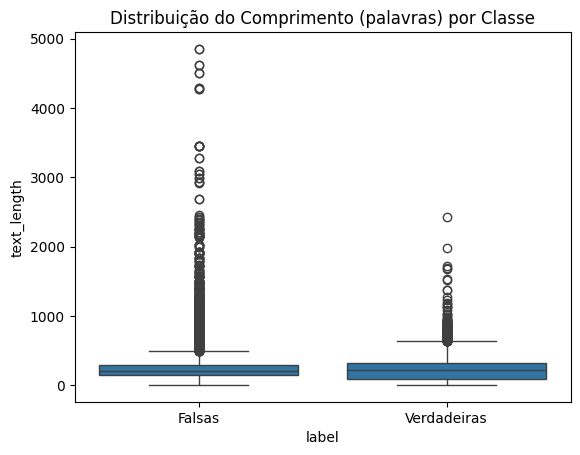

In [5]:
# Comparar o comprimento das palavras por classe
sns.boxplot(x='label', y='text_length', data=processed_df)
plt.xticks(ticks=[0, 1], labels=['Falsas', 'Verdadeiras'])
plt.title('Distribuição do Comprimento (palavras) por Classe')
plt.show()

### Observações Gerais

O gráfico boxplot apresenta a distribuição do comprimento dos textos (em número de palavras) para as classes de notícias falsas e verdadeiras. É possível observar que ambas as classes possuem uma grande variação no tamanho dos textos, com a maioria concentrada em faixas semelhantes, mas com presença de outliers em ambas as categorias.

### Insights

- **Distribuição Similar:** Tanto notícias falsas quanto verdadeiras apresentam distribuições de comprimento bastante parecidas, com medianas próximas e faixas interquartis semelhantes.
- **Outliers:** Existem textos extremamente longos em ambas as classes, mas as notícias falsas parecem apresentar uma quantidade maior de outliers, incluindo textos com mais de 4.000 palavras.
- **Concentração:** A maior parte dos textos, em ambas as classes, está concentrada abaixo de 500 palavras, indicando que o dataset é composto majoritariamente por notícias de tamanho moderado.

### Conclusões

- O comprimento dos textos, por si só, não parece ser um forte discriminador entre notícias falsas e verdadeiras, já que ambas as classes apresentam padrões semelhantes.
- Estratégias de pré-processamento, como remoção ou tratamento de outliers, podem ser úteis para evitar que textos atípicos influenciem negativamente o treinamento dos modelos.
- A análise reforça a necessidade de considerar múltiplas características linguísticas e contextuais, além do comprimento, para uma classificação mais precisa das notícias.

## Frequência de publicação de notícias ao longo do tempo

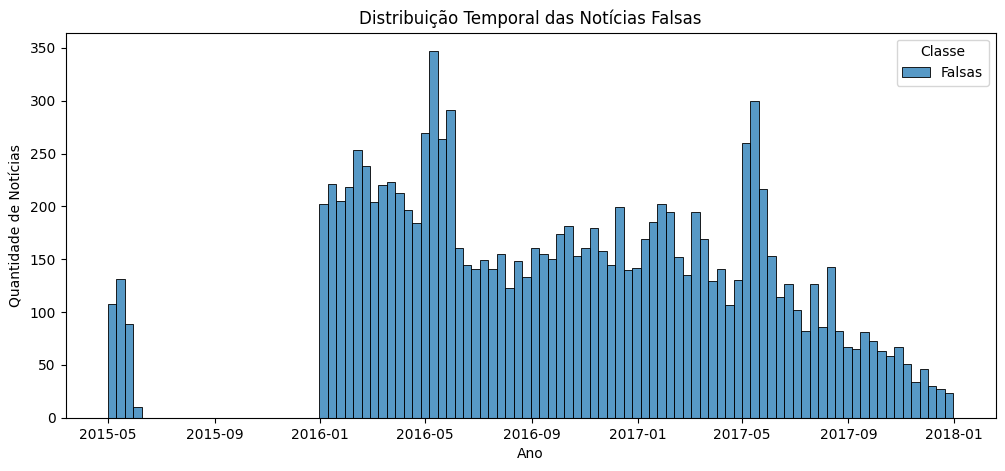

In [6]:
# Certifique-se de que a coluna 'date' está em datetime
processed_df['date'] = pd.to_datetime(processed_df['date'], errors='coerce')

# Visualização temporal
plt.figure(figsize=(12, 5))
sns.histplot(data=processed_df, x='date', hue='label', bins=100, kde=False, multiple='stack')
plt.title("Distribuição Temporal das Notícias Falsas")
plt.xlabel("Ano")
plt.ylabel("Quantidade de Notícias")
plt.legend(title='Classe', labels=['Falsas', 'Verdadeiras'])
plt.show()


### Observações Gerais

O gráfico apresenta a quantidade de notícias falsas publicadas ao longo do tempo, entre 2015 e o início de 2018. É possível observar variações significativas na frequência de notícias falsas em diferentes períodos.

### Insights

- **Picos de Publicação:** Há dois grandes picos de notícias falsas: um por volta de meados de 2016 e outro no primeiro semestre de 2017. Esses períodos coincidem com eventos políticos importantes, como as eleições presidenciais dos EUA em 2016 e o início do novo governo em 2017, sugerindo que a produção de fake news aumenta em momentos de maior interesse público e polarização.
- **Tendência de Queda:** Após o pico de 2017, observa-se uma tendência de queda na quantidade de notícias falsas publicadas, indicando possível redução do interesse, maior fiscalização ou mudanças no cenário político.
- **Períodos de Baixa:** Entre meados de 2015 e o início de 2016, há poucos registros de notícias falsas, o que pode indicar menor coleta de dados nesse período ou menor produção de fake news antes do ciclo eleitoral.
- **Variação Mensal:** A quantidade de notícias falsas varia consideravelmente de mês para mês, refletindo a influência de eventos pontuais, crises políticas ou acontecimentos de grande repercussão.

### Conclusões

- A produção e disseminação de notícias falsas está fortemente relacionada ao contexto político e a eventos de grande impacto social.
- Picos de fake news tendem a ocorrer em períodos de eleições ou transições de governo, reforçando a necessidade de monitoramento intensivo nesses momentos.
- A análise temporal é fundamental para entender padrões de comportamento e pode auxiliar na criação de estratégias preventivas e de resposta rápida à desinformação.

## Correlação entre Atributos Numéricos

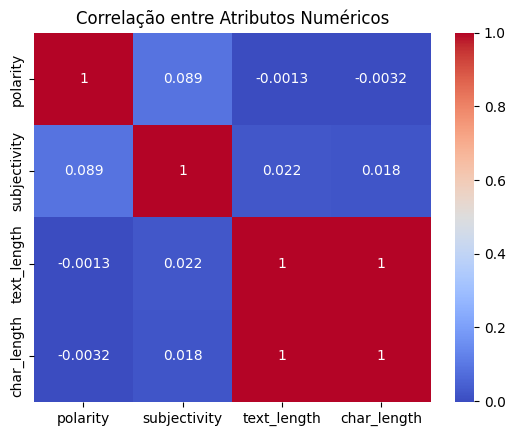

In [8]:
def analyze_sentiment(text):
        blob = TextBlob(text)
        return blob.sentiment.polarity, blob.sentiment.subjectivity
    
sentiments = processed_df['full_text_clean'].apply(analyze_sentiment)
processed_df['polarity'] = sentiments.apply(lambda x: x[0])
processed_df['subjectivity'] = sentiments.apply(lambda x: x[1])

numeric_cols = ['polarity', 'subjectivity', 'text_length', 'char_length']
correlation_matrix = processed_df[numeric_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlação entre Atributos Numéricos")
plt.show()


### Análise atributo por atributo

| Atributo 1   | Atributo 2   | Correlação  | Interpretação                                                                                                               |
| ------------ | ------------ | ----------- | --------------------------------------------------------------------------------------------------------------------------- |
| text\_length | char\_length | **1.00**    | Correlação perfeita — esperado, pois o número de caracteres depende diretamente do número de palavras.                      |
| polarity     | subjectivity | **0.089**   | Correlação muito fraca e positiva — textos mais subjetivos tendem a ter uma leve inclinação de polaridade.                  |
| polarity     | text\_length | **-0.0013** | Correlação nula — o comprimento do texto não influencia o sentimento.                                                   |
| polarity     | char\_length | **-0.0032** | Também nula — reforça a independência do sentimento com o tamanho textual.                                                  |
| subjectivity | text\_length | **0.022**   | Correlação muito fraca — textos ligeiramente mais longos tendem a ser um pouco mais subjetivos, mas o efeito é desprezível. |
| subjectivity | char\_length | **0.018**   | Mesmo padrão anterior — efeito insignificante.                                                                              |
